In [1]:
# 201904213 산업데이터사이언스학부 심성빈

In [1]:
import pandas as pd # pandas생성

In [2]:
df = pd.read_csv("full_data.csv") # csv파일 불어오기

In [3]:
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # standarscaler를 통해 표준화 
import seaborn as sns
sns.set(style="darkgrid")

# pandas, numpy, matplot 라이브러리 생성

In [5]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [8]:
df.info() # 결측치 확인
# 결측지 존재 x
# 전처리 과정 생략 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [9]:
df.dtypes.value_counts() # 데이터 타입 확인

object     5
float64    3
int64      3
dtype: int64

In [10]:
df.gender.value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [11]:
df.age.value_counts()

78.00    102
57.00     92
54.00     85
51.00     84
79.00     84
        ... 
1.16       3
0.48       3
0.40       2
0.08       2
0.16       1
Name: age, Length: 104, dtype: int64

In [12]:
target = 'stroke'
X = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

# x는 데이터의 모든 특성을 가지고 있고 y는 X의 특징을 기반으로 개인이 뇌졸중 위험에 노출되어 있는지 여부를 예측하려는 대상 변수를 포함합니다. 

In [13]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
# columns라는 변수 생성
X = pd.get_dummies(X[columns]) # 가변수로 바꿔주는 작업

0    4733
1     248
Name: stroke, dtype: int64


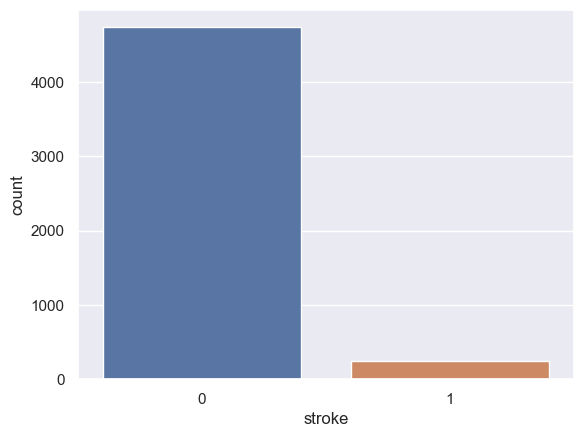

In [14]:
ax = sns.countplot(x=target,data=df)
# 막대형 그래프 생성
print(df[target].value_counts())

In [15]:
percentage_no_stroke = 100*(4733/float(df.shape[0]))
percentage_no_stroke
# 백분율로 치환하여 뇌졸증 증상이 없는 환자의 비율 표시

95.0210801043967

In [16]:
percentage_yes_stroke = 100*(248/float(df.shape[0]))
percentage_yes_stroke
# 백분율로 치환하여 뇌졸증 증상이 없는 환자의 비율 표시

4.978919895603292

In [17]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# 오버샘플링 진행

1    4733
0    4733
Name: stroke, dtype: int64


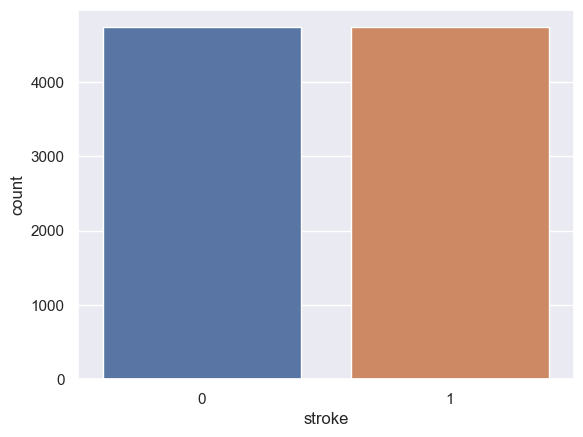

In [20]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())
# 분포 시각화 및 클래스 개수 출력

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, shuffle=True)
# X_train과 Y_train을 사용하여 모델을 훈련하고, X_test와 Y_test를 사용하여 훈련된 모델의 성능을 평가

In [22]:
# Random Forest model building
from sklearn.ensemble import RandomForestClassifier

def rf(X_train, Y_train, n_estimators=250):
 rndforest = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
 rndforest.fit(X_train, Y_train)
 return rndforest

In [23]:
random_forest_en = rf(X_train,Y_train.values.ravel(), n_estimators=250)

In [24]:
print("TRAINING ACCURACY:", random_forest_en.score(X_train, Y_train))
print("VALIDATION ACCURACY", random_forest_en.score(X_test, Y_test))

# 검증정확도 계산
# 검증정확도 0.97로 매우 높은 성능인걸 확인 가능
# 학습정확도는 1.0으로 100% 정확하게 예측했다는것을 확인 할 수 있다.

TRAINING ACCURACY: 1.0
VALIDATION ACCURACY 0.9672650475184794


In [25]:
from matplotlib import pyplot as plt

In [27]:
import itertools
def plot_confusion_matrix(model, X, y, class_names, file_name,
                          normalize=False,
                          title='CONFUSION MATRIX',
                          cmap=plt.cm.Greys):
    y_pred = model.predict(X)# x에 대한 예측값 
    
    # confusion matrix
    cnf_matrix  = confusion_matrix(y, y_pred)#타깃 데이터 y와 예측 값 y_pred를 비교하여 혼동 행렬을 계산
    np.set_printoptions(precision=1)#출력 시 소수점 이하 1자리까지 표시되도록 출력 옵션
    plt.figure(figsize=(18, 16))

    if normalize:#정규화 여부에 따라 혼동 행렬을 정규화하거나 그대로 출력
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("CONFUSION MATRIX")
    else:
        print('CONFUSION MATRIX')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title('CONFUSION MATRIX')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    fmt = '.2f' if normalize else 'd'# 혼동 행렬의 값 포맷을 설정
    thresh = cnf_matrix.max() / 2.# 혼동 행렬의 최댓값의 절반을 임계값으로 설정
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")#혼동 행렬의 모든 요소에 대해 반복1

    plt.ylabel('CLASS')
    plt.xlabel('PREDICTED CLASS')
    plt.tight_layout()
    plt.savefig(file_name+'.png')
    plt.show()

CONFUSION MATRIX


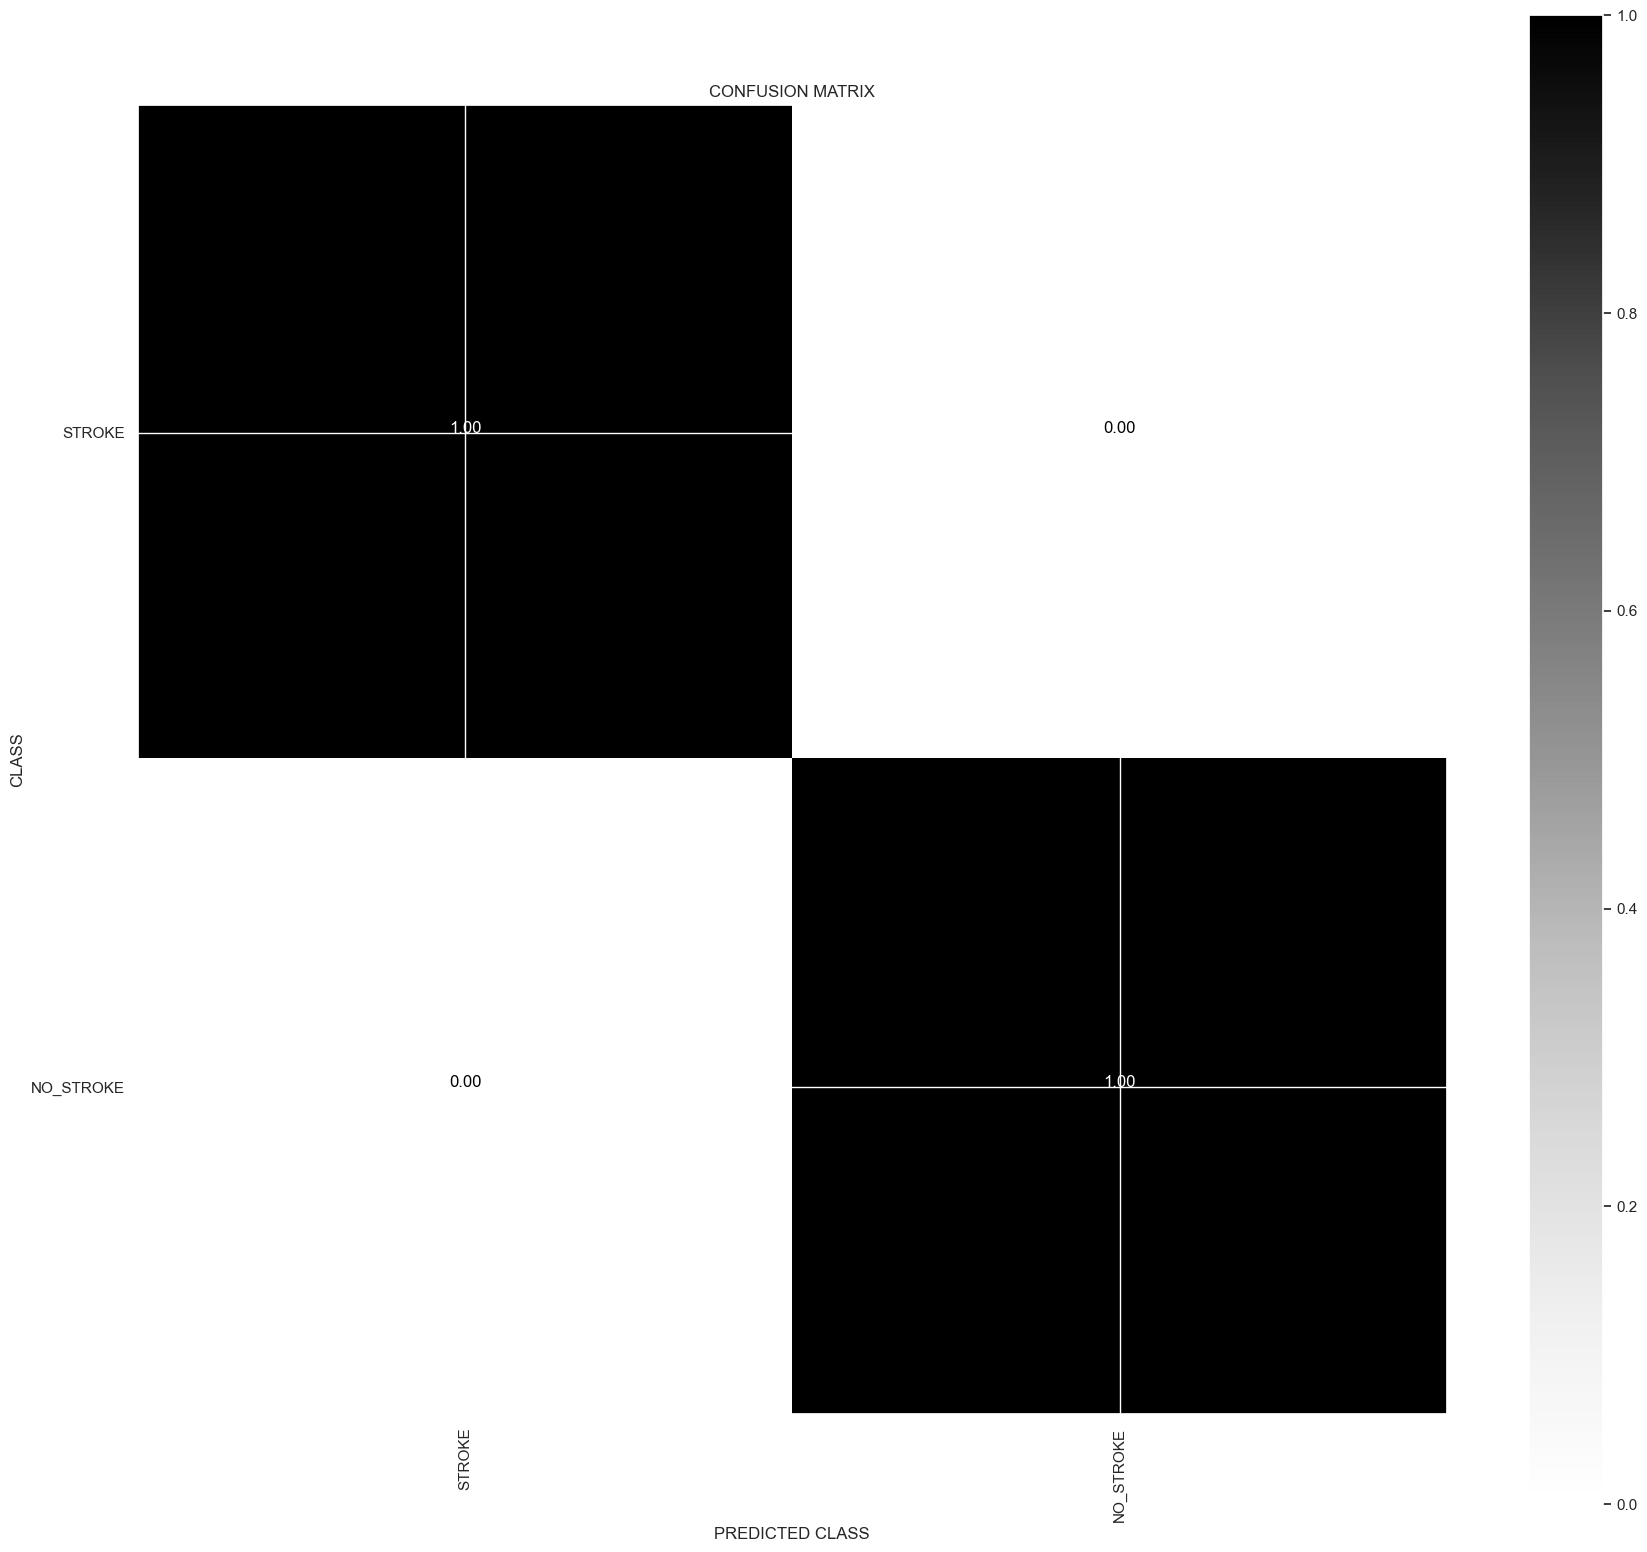

In [28]:
from sklearn.metrics import confusion_matrix

LABELS = ['STROKE', 'NO_STROKE']
plot_confusion_matrix(random_forest_en, X_train, Y_train, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)
#혼동 행렬을 시각화하는 함수를 호출하여 랜덤 포레스트 모델의 훈련 데이터에 대한 혼동 행렬을 시각화하는 코드

CONFUSION MATRIX


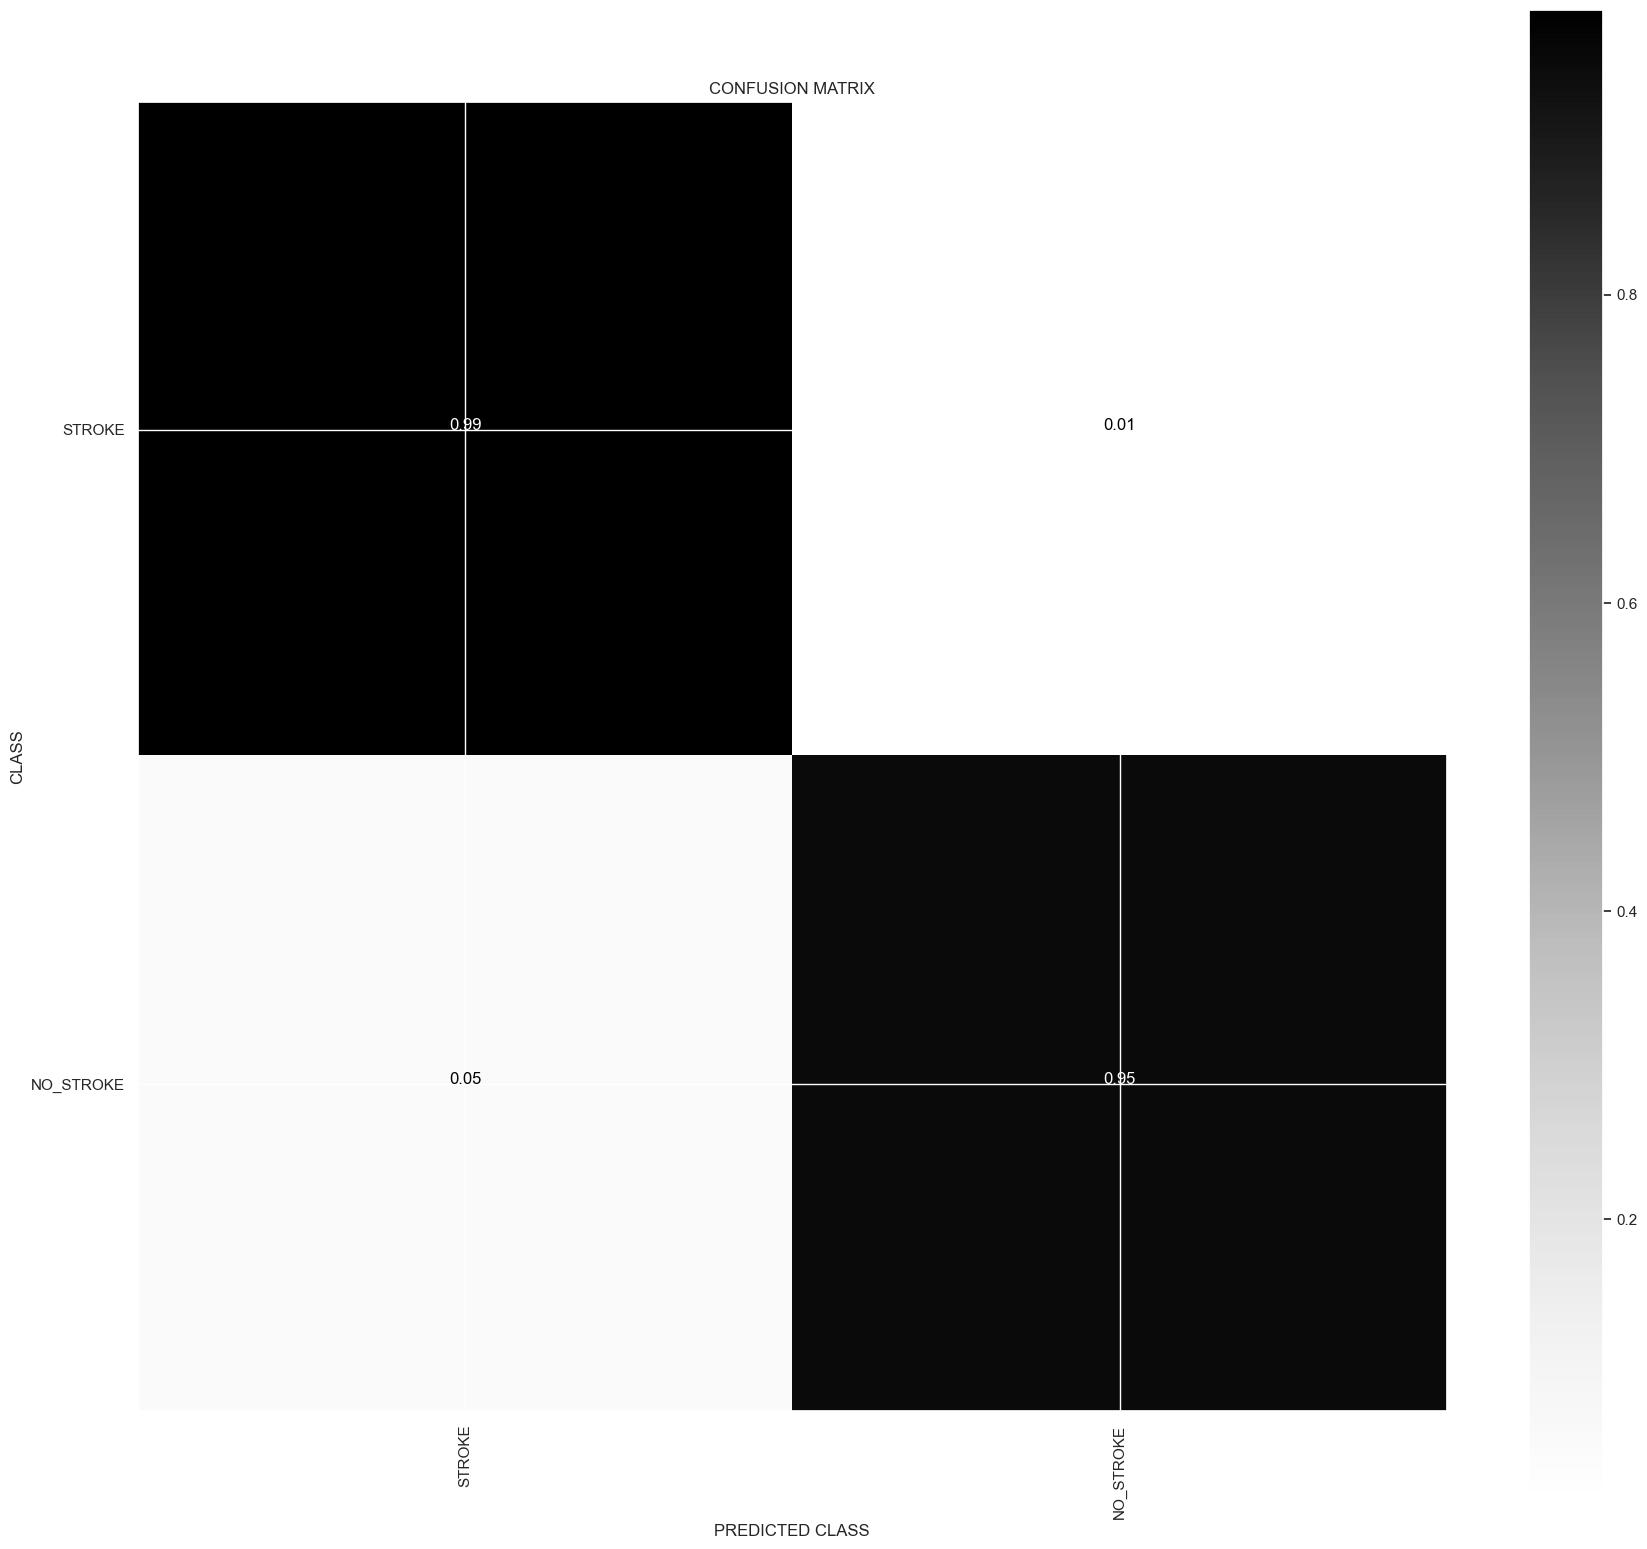

In [29]:
plot_confusion_matrix(random_forest_en, X_test, Y_test, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)
